# Explore here

In [37]:
#Paso 1: Definición del problema


🎯 Problema de negocio
La depresión es uno de los trastornos mentales más prevalentes a nivel mundial. Se estima que millones de personas la padecen, y muchas de ellas no reciben el tratamiento adecuado debido a estigmas sociales, falta de diagnóstico o acceso limitado a servicios de salud mental. La detección temprana es esencial para intervenir oportunamente y prevenir consecuencias graves como el deterioro en la calidad de vida o incluso el suicidio.

El objetivo de este proyecto es desarrollar un sistema de predicción que, basándose en información sociodemográfica, historial médico y hábitos de vida de los individuos, sea capaz de detectar indicios de depresión. Esto permitiría generar herramientas de apoyo para psicólogos, profesionales de salud, instituciones educativas o incluso en ambientes laborales, facilitando intervenciones tempranas y preventivas.

Problema de Machine Learning
Se plantea un problema de clasificación binaria, donde a partir de variables como la edad, estado civil, nivel educativo, hábitos alimenticios, patrones de sueño, historial médico, entre otras, se busca predecir si una persona se encuentra en un estado depresivo (1) o no (0).


In [38]:
#Paso 2: Obtencion y carga del conjunto de datos

In [39]:
import pandas as pd

df = pd.read_csv('../data/raw/depression_data.csv')
print(df.head())


               Name  Age Marital Status    Education Level  \
0  Christine Barker   31        Married  Bachelor's Degree   
1  Jacqueline Lewis   55        Married        High School   
2    Shannon Church   78        Widowed    Master's Degree   
3    Charles Jordan   58       Divorced    Master's Degree   
4      Michael Rich   18         Single        High School   

   Number of Children Smoking Status Physical Activity Level  \
0                   2     Non-smoker                  Active   
1                   1     Non-smoker               Sedentary   
2                   1     Non-smoker               Sedentary   
3                   3     Non-smoker                Moderate   
4                   0     Non-smoker               Sedentary   

  Employment Status     Income Alcohol Consumption Dietary Habits  \
0        Unemployed   26265.67            Moderate       Moderate   
1          Employed   42710.36                High      Unhealthy   
2          Employed  125332.79     

In [40]:
def calcular_depresion(row):
    factores = 0
    if row['History of Mental Illness'] == 'Yes':
        factores += 1
    if row['History of Substance Abuse'] == 'Yes':
        factores += 1
    if row['Family History of Depression'] == 'Yes':
        factores += 1
    if row['Sleep Patterns'] == 'Poor':
        factores += 1
    if row['Chronic Medical Conditions'] == 'Yes':
        factores += 1
    if row['Physical Activity Level'] == 'Sedentary':
        factores += 1
    if row['Alcohol Consumption'] == 'High':
        factores += 1
    return 1 if factores >= 2 else 0

df['Depressed'] = df.apply(calcular_depresion, axis=1)


Nota sobre la variable objetivo:
Dado que el dataset original no incluía una columna explícita que indicara si una persona se encuentra en estado depresivo,
se generó una variable sintética Depressed basada en criterios clínicamente reconocidos como factores de riesgo de depresión,
tales como: historial de enfermedad mental, trastornos del sueño, abuso de sustancias, antecedentes familiares, entre otros.
Esta aproximación se utilizó exclusivamente para fines académicos, con el objetivo de demostrar el proceso completo de Machine
Learning aplicado a datos de salud mental.
La variable puede generar ruido o sesgo, y se considera como una limitación del modelo.

#Depressed = 1 → indica un caso considerado con alto riesgo de depresión.
#Depressed = 0 → indica un caso considerado sin riesgo significativo de depresión.

In [41]:
#Paso 3: Almacenar la información

In [42]:
import sqlite3
import pandas as pd

#Conectar df a SQL
conn = sqlite3.connect("depression_data.db")

# Almacenar los datos en la base de datos SQLite en una tabla llamada 'health_data'
df.to_sql('health_data', conn, if_exists='replace', index=False)
print("Datos cargados correctamente en la base de datos 'mental_health.db'")


Datos cargados correctamente en la base de datos 'mental_health.db'


In [43]:
# 1: Ver las primeras 5 filas
query1 = "SELECT * FROM health_data LIMIT 5"
print("▶ Consulta 1: Primeras 5 filas")
print(pd.read_sql(query1, conn), "\n")



▶ Consulta 1: Primeras 5 filas
               Name  Age Marital Status    Education Level  \
0  Christine Barker   31        Married  Bachelor's Degree   
1  Jacqueline Lewis   55        Married        High School   
2    Shannon Church   78        Widowed    Master's Degree   
3    Charles Jordan   58       Divorced    Master's Degree   
4      Michael Rich   18         Single        High School   

   Number of Children Smoking Status Physical Activity Level  \
0                   2     Non-smoker                  Active   
1                   1     Non-smoker               Sedentary   
2                   1     Non-smoker               Sedentary   
3                   3     Non-smoker                Moderate   
4                   0     Non-smoker               Sedentary   

  Employment Status     Income Alcohol Consumption Dietary Habits  \
0        Unemployed   26265.67            Moderate       Moderate   
1          Employed   42710.36                High      Unhealthy   
2   

In [44]:
# 2: Contar personas deprimidas (1) vs no deprimidas (0)
query2 = "SELECT Depressed, COUNT(*) as Total FROM health_data GROUP BY Depressed"
print("▶ Consulta 2: Conteo deprimidos vs no")
print(pd.read_sql(query2, conn), "\n")



▶ Consulta 2: Conteo deprimidos vs no
   Depressed   Total
0          0  128135
1          1  285633 



In [45]:
# Consulta 3: Ver distribución por nivel de actividad física
query3 = "SELECT [Physical Activity Level], COUNT(*) as Total FROM health_data GROUP BY [Physical Activity Level]"
print("▶ Consulta 3: Conteo por nivel de actividad física")
print(pd.read_sql(query3, conn), "\n")

▶ Consulta 3: Conteo por nivel de actividad física
  Physical Activity Level   Total
0                  Active   78905
1                Moderate  158013
2               Sedentary  176850 



In [46]:
query4 = "SELECT [Sleep Patterns], COUNT(*) as Total FROM health_data GROUP BY [Sleep Patterns]"
print("▶ Consulta 4: Conteo por patrón de sueño")
print(pd.read_sql(query4, conn), "\n")

▶ Consulta 4: Conteo por patrón de sueño
  Sleep Patterns   Total
0           Fair  196789
1           Good   87397
2           Poor  129582 



In [47]:
# Consulta 5: Porcentaje promedio de depresión por consumo de alcohol
query5 = """
    SELECT [Alcohol Consumption], ROUND(AVG(Depressed), 2) as Porcentaje_Deprimidos
    FROM health_data
    GROUP BY [Alcohol Consumption]
"""
print("▶ Consulta 5: Porcentaje de deprimidos por consumo de alcohol")
print(pd.read_sql(query5, conn), "\n")

# Cerrar conexión
conn.close()

▶ Consulta 5: Porcentaje de deprimidos por consumo de alcohol


  Alcohol Consumption  Porcentaje_Deprimidos
0                High                   0.94
1                 Low                   0.61
2            Moderate                   0.61 



In [48]:
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Depressed
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes,1
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes,1
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No,1
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No,0
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes,1


In [49]:
df = df.drop(columns=['Name'])

No aporta nada Name

In [50]:
#Paso 4: Realiza un análisis descriptivo

In [51]:
df.describe()


,Age,Number of Children,Income,Depressed
count,413768.000000,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971,0.690322
std,18.158759,1.237054,40624.100565,0.462362
min,18.000000,0.000000,0.410000,0.000000
25%,33.000000,0.000000,21001.030000,0.000000
50%,49.000000,1.000000,37520.135000,1.000000
75%,65.000000,2.000000,76616.300000,1.000000
max,80.000000,4.000000,209995.220000,1.000000


In [52]:
df.describe(include=['object'])

,Marital Status,Education Level,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
count,413768,413768,413768,413768,413768,413768,413768,413768,413768,413768,413768,413768
unique,4,5,3,3,2,3,3,3,2,2,2,2
top,Married,Bachelor's Degree,Non-smoker,Sedentary,Employed,Moderate,Unhealthy,Fair,No,No,No,No
freq,240444,124329,247416,176850,265659,173440,170817,196789,287943,284880,302515,277561


In [53]:
df.isnull().sum()

Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
Depressed                       0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           413768 non-null  int64  
 1   Marital Status                413768 non-null  object 
 2   Education Level               413768 non-null  object 
 3   Number of Children            413768 non-null  int64  
 4   Smoking Status                413768 non-null  object 
 5   Physical Activity Level       413768 non-null  object 
 6   Employment Status             413768 non-null  object 
 7   Income                        413768 non-null  float64
 8   Alcohol Consumption           413768 non-null  object 
 9   Dietary Habits                413768 non-null  object 
 10  Sleep Patterns                413768 non-null  object 
 11  History of Mental Illness     413768 non-null  object 
 12  History of Substance Abuse    413768 non-nul

In [55]:
#Paso 5: Realiza un EDA completo

In [56]:
#Revisar subniveles (opciones a elegir por columna) de las columnas 
columnas_categoricas=['Marital Status','Education Level','Smoking Status','Physical Activity Level','Employment Status','Dietary Habits','Sleep Patterns','History of Mental Illness','History of Substance Abuse','Family History of Depression','Chronic Medical Conditions']

for col in columnas_categoricas:
    print(f'Columna {col}: {df[col].nunique()} subniveles')

Columna Marital Status: 4 subniveles
Columna Education Level: 5 subniveles
Columna Smoking Status: 3 subniveles
Columna Physical Activity Level: 3 subniveles
Columna Employment Status: 2 subniveles
Columna Dietary Habits: 3 subniveles
Columna Sleep Patterns: 3 subniveles
Columna History of Mental Illness: 2 subniveles
Columna History of Substance Abuse: 2 subniveles
Columna Family History of Depression: 2 subniveles


Columna Chronic Medical Conditions: 2 subniveles


In [57]:
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

for col in columnas_numericas:
        print(f'Columna {col}: {df[col].nunique()} subniveles')

Columna Age: 63 subniveles
Columna Number of Children: 5 subniveles
Columna Income: 405282 subniveles
Columna Depressed: 2 subniveles


In [58]:
#Dimensiones DF
df.shape

(413768, 16)

In [59]:
df.drop_duplicates(inplace=True)

In [60]:
df.shape

(413768, 16)

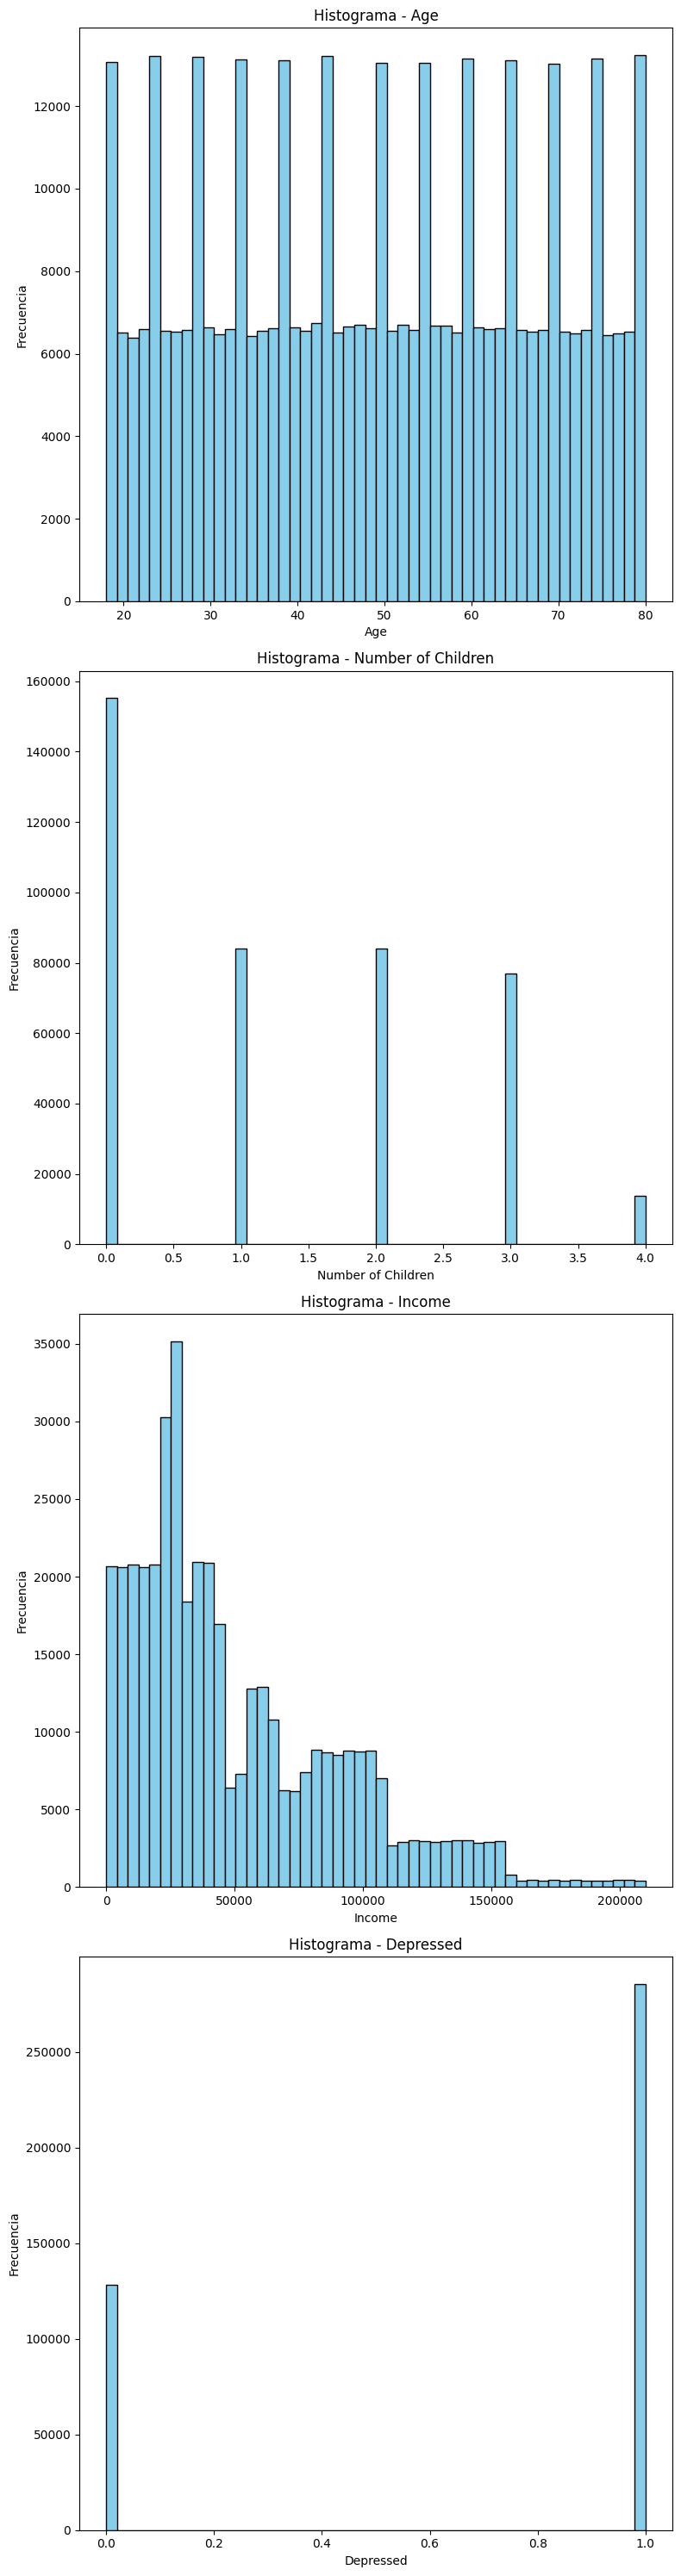

In [61]:
#Histograma
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8, 30))
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(columnas_numericas):
    ax[i].hist(df[col], bins=50, color='skyblue', edgecolor='black')
    ax[i].set_title(f'Histograma - {col}', fontsize=12)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

/tmp/ipykernel_51521/1965867493.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)
/tmp/ipykernel_51521/1965867493.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)
/tmp/ipykernel_51521/1965867493.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)
/tmp/ipykernel_51521/1965867493.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)
/tmp/ipykernel_51521/1965867493.py:7: UserWarning: set_ticklabels() should only be used with

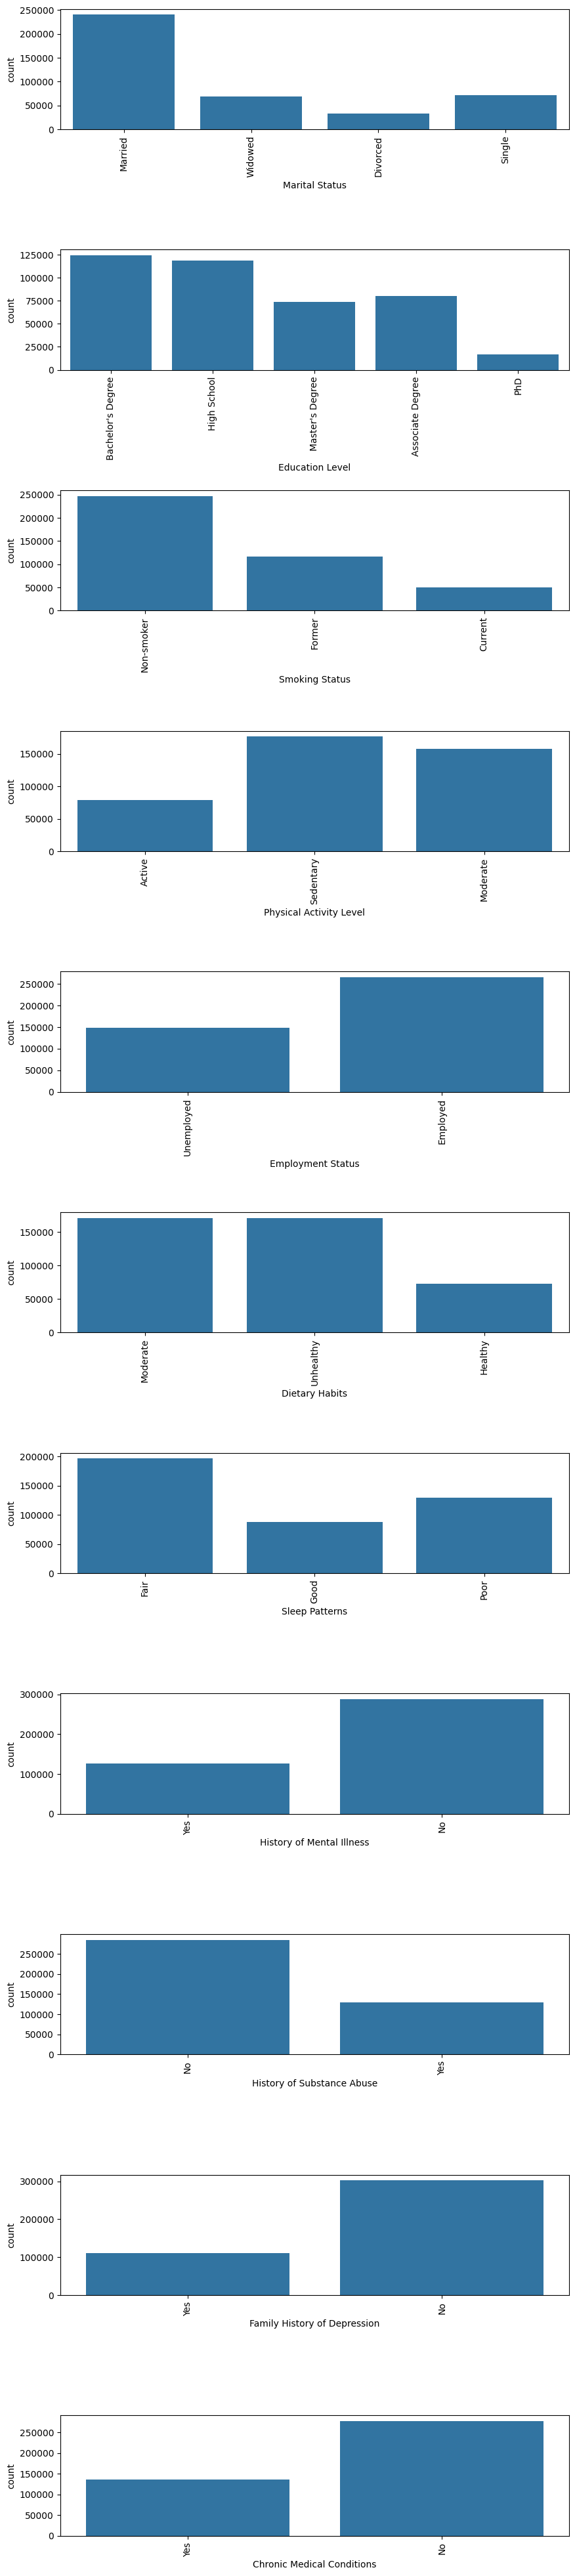

In [62]:
import seaborn as sns
#Gráfico de barras
fig,ax=plt.subplots(nrows=11,ncols=1,figsize=(10,50))
fig.subplots_adjust(hspace=1)
for i, col in enumerate(columnas_categoricas):
    sns.countplot(x=col,data=df,ax=ax[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)

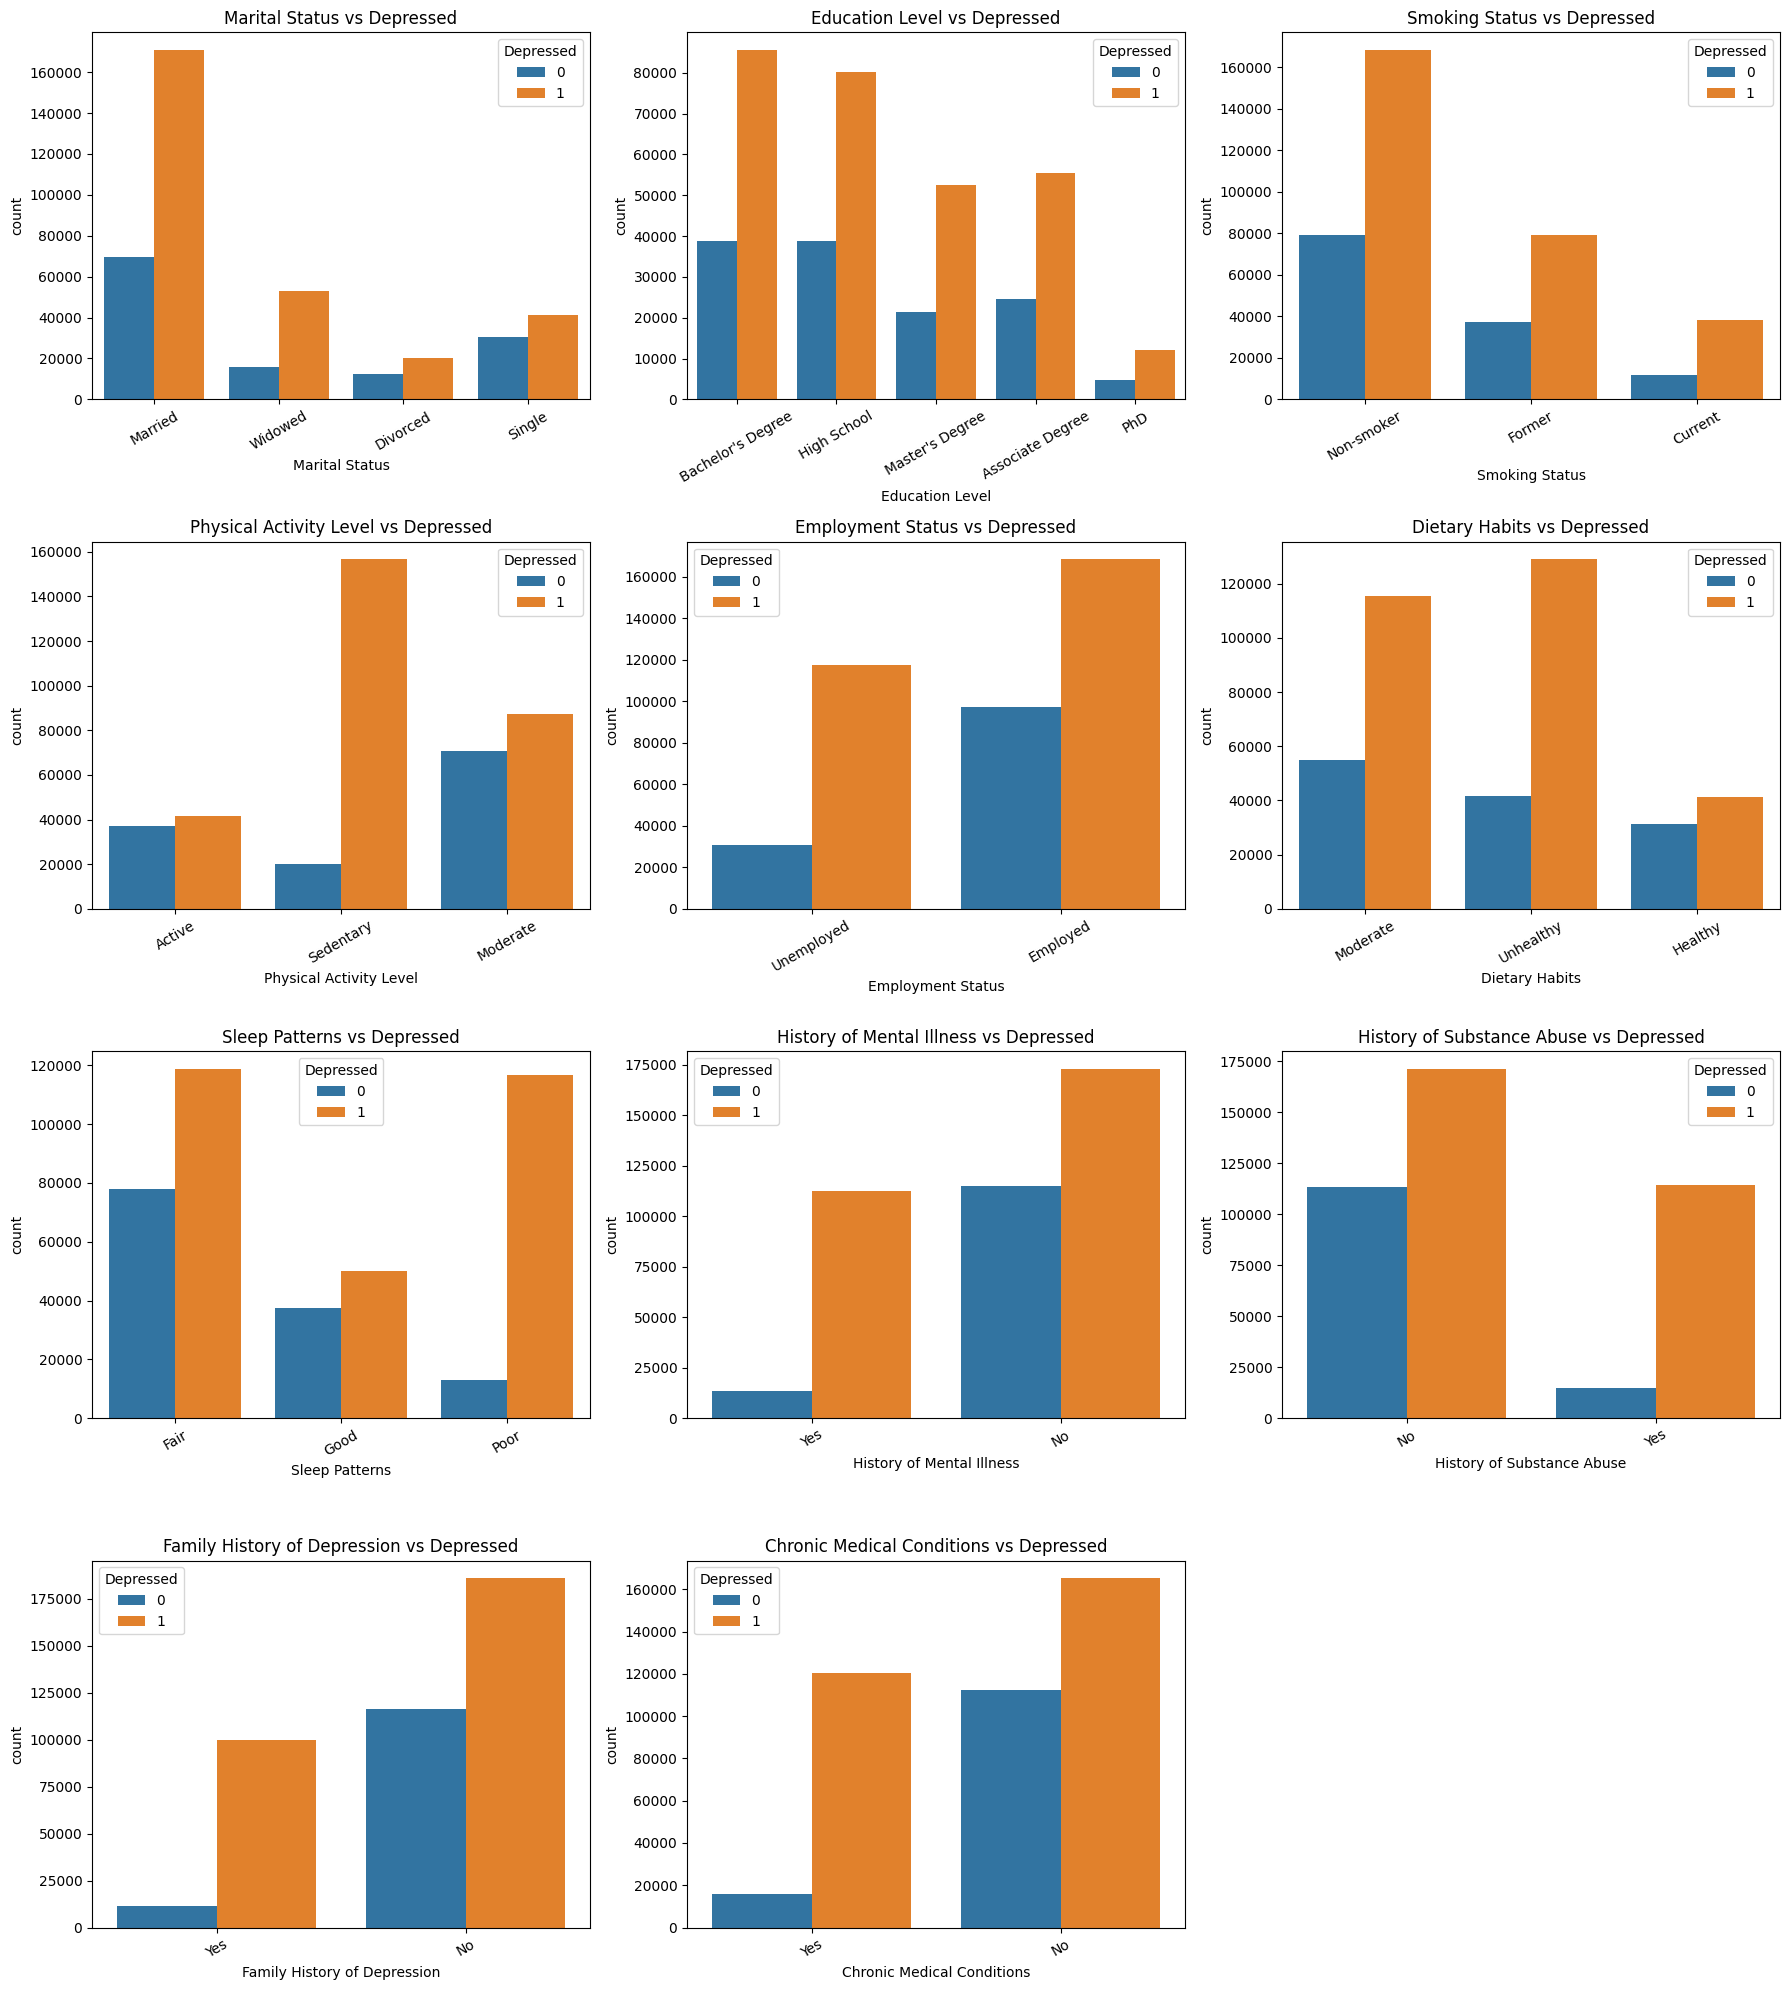

In [63]:
#ANALISIS VARIABLE UNIVARIANTE
#Variables Categoricas
n_cols = 3
n_rows = (len(columnas_categoricas) + n_cols - 1) // n_cols  # redondea hacia arriba

fig, axis = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))

axis = axis.flatten()

# Crear los gráficos
for i, col in enumerate(columnas_categoricas):
    sns.countplot(ax=axis[i], data=df, x=col, hue='Depressed')
    axis[i].set_title(f'{col} vs Depressed')
    axis[i].tick_params(axis='x', rotation=30)

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axis)):
    fig.delaxes(axis[j])

plt.tight_layout()
plt.show()

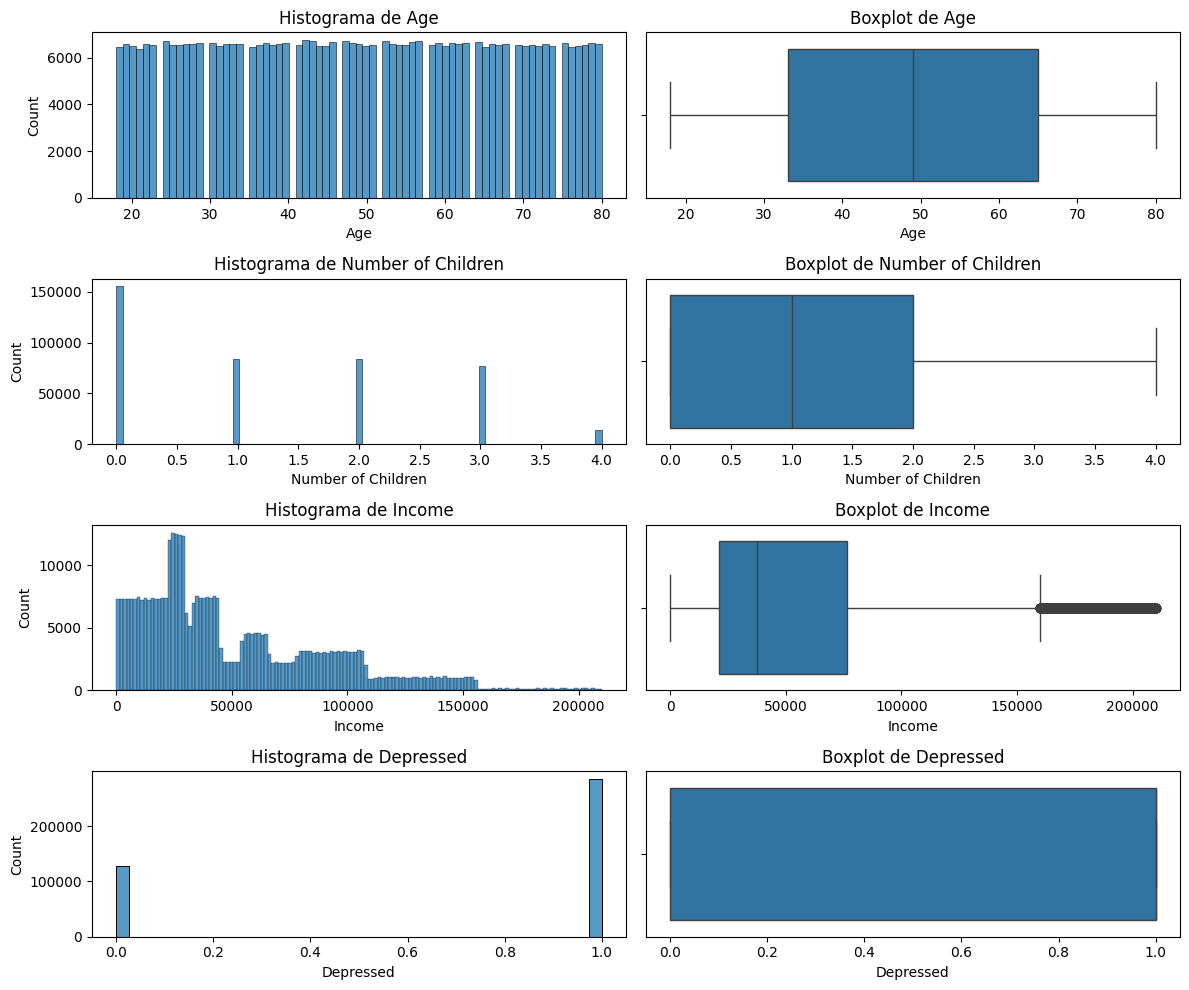

In [64]:
#ANALISIS VARIABLE UNIVARIANTE
#Variables númericas
fig, axis = plt.subplots(4, 2, figsize=(12, 10), gridspec_kw={'height_ratios': [6, 6, 6, 6]})

for i, var in enumerate(columnas_numericas):
    sns.histplot(ax=axis[i, 0], data=df, x=var)
    sns.boxplot(ax=axis[i, 1], data=df, x=var, orient='h')
    axis[i, 0].set_title(f'Histograma de {var}')
    axis[i, 1].set_title(f'Boxplot de {var}')

plt.tight_layout()

In [65]:
df.describe()

,Age,Number of Children,Income,Depressed
count,413768.000000,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971,0.690322
std,18.158759,1.237054,40624.100565,0.462362
min,18.000000,0.000000,0.410000,0.000000
25%,33.000000,0.000000,21001.030000,0.000000
50%,49.000000,1.000000,37520.135000,1.000000
75%,65.000000,2.000000,76616.300000,1.000000
max,80.000000,4.000000,209995.220000,1.000000


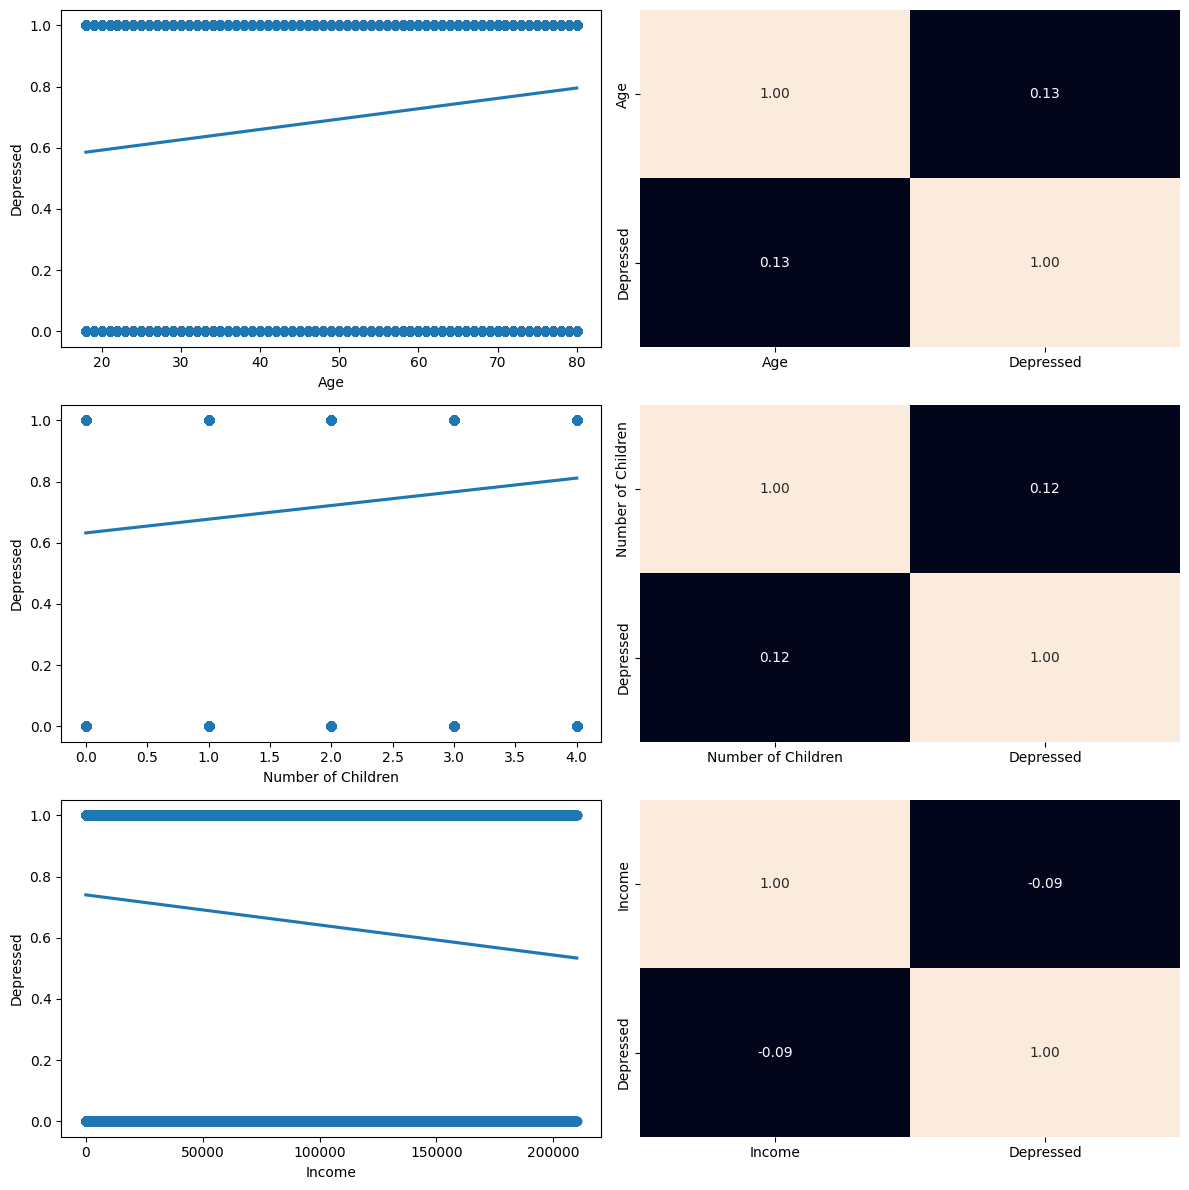

In [66]:
#ANALISIS VARIABLE MULTIVARIANTE
#NÚMERICO - NÚMERICO
cols_num=['Age','Number of Children','Income']
fig, axis = plt.subplots(3, 2, figsize=(12, 12))

for i, col in enumerate(cols_num):
    sns.regplot(ax=axis[i, 0], data=df, x=col, y='Depressed')
    sns.heatmap(df[[col, 'Depressed']].corr(), annot=True, fmt='.2f',
                ax=axis[i, 1], cbar=False, yticklabels=[col, 'Depressed'])

plt.tight_layout()
plt.show()

Interpretación:
Las tres variables tienen una relación débil con la depresión.

La edad y el número de hijos parecen asociarse levemente a una mayor probabilidad de depresión.

Mayores ingresos parecen estar débilmente asociados a una menor depresión.

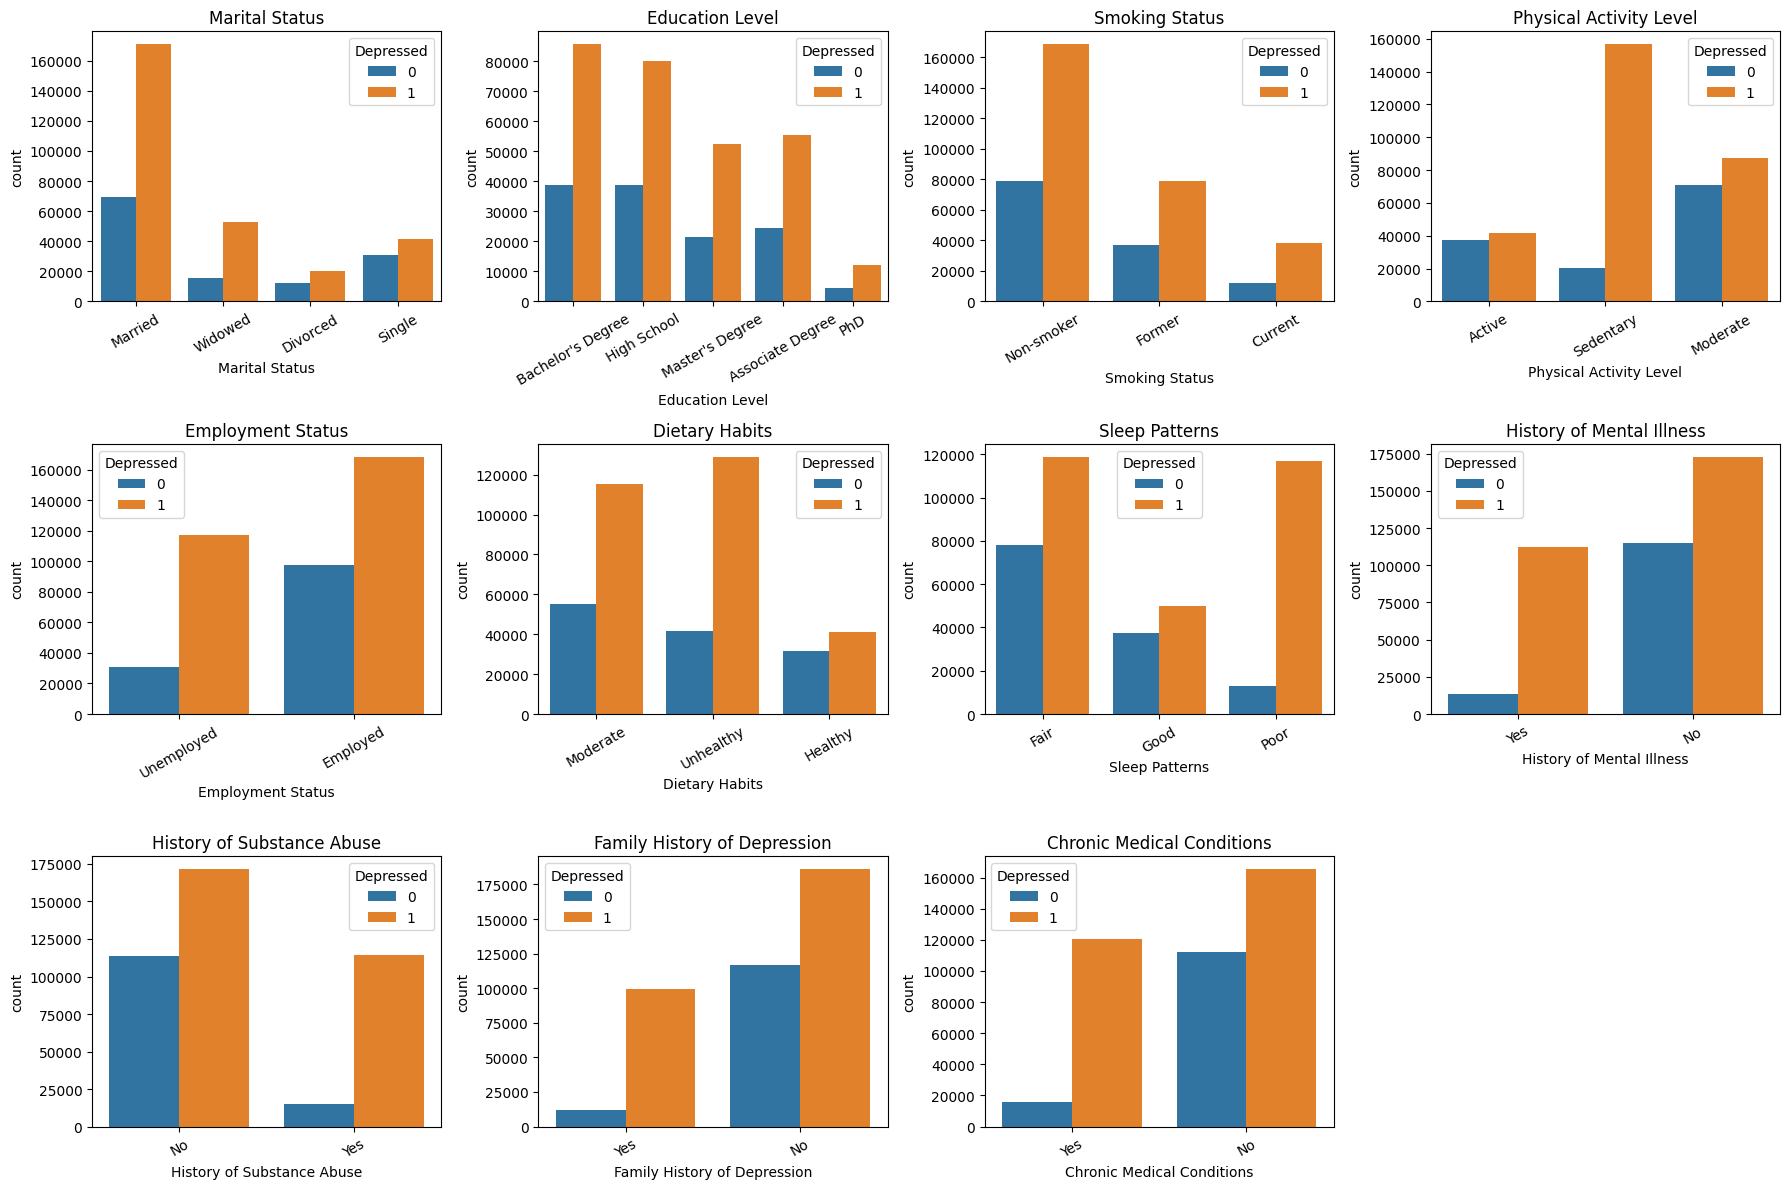

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(3, 4, figsize=(18, 12))  

sns.countplot(ax=axis[0, 0], data=df, x='Marital Status', hue='Depressed')
axis[0, 0].set_title('Marital Status')
axis[0, 0].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[0, 1], data=df, x='Education Level', hue='Depressed')
axis[0, 1].set_title('Education Level')
axis[0, 1].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[0, 2], data=df, x='Smoking Status', hue='Depressed')
axis[0, 2].set_title('Smoking Status')
axis[0, 2].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[0, 3], data=df, x='Physical Activity Level', hue='Depressed')
axis[0, 3].set_title('Physical Activity Level')
axis[0, 3].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[1, 0], data=df, x='Employment Status', hue='Depressed')
axis[1, 0].set_title('Employment Status')
axis[1, 0].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[1, 1], data=df, x='Dietary Habits', hue='Depressed')
axis[1, 1].set_title('Dietary Habits')
axis[1, 1].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[1, 2], data=df, x='Sleep Patterns', hue='Depressed')
axis[1, 2].set_title('Sleep Patterns')
axis[1, 2].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[1, 3], data=df, x='History of Mental Illness', hue='Depressed')
axis[1, 3].set_title('History of Mental Illness')
axis[1, 3].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[2, 0], data=df, x='History of Substance Abuse', hue='Depressed')
axis[2, 0].set_title('History of Substance Abuse')
axis[2, 0].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[2, 1], data=df, x='Family History of Depression', hue='Depressed')
axis[2, 1].set_title('Family History of Depression')
axis[2, 1].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[2, 2], data=df, x='Chronic Medical Conditions', hue='Depressed')
axis[2, 2].set_title('Chronic Medical Conditions')
axis[2, 2].tick_params(axis='x', rotation=30)

# Eliminar celda vacía sobrante
fig.delaxes(axis[2, 3])

plt.tight_layout()
plt.show()


In [68]:
# Función para calcular proporción de deprimidos por categoría
def porcentaje_depresion(col):
    return df.groupby(col)['Depressed'].mean().sort_values(ascending=False).round(2)

categoricas = [
    'Marital Status', 'Education Level', 'Smoking Status',
    'Physical Activity Level', 'Employment Status',
    'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness',
    'History of Substance Abuse', 'Family History of Depression',
    'Chronic Medical Conditions'
]

for col in categoricas:
    print(f"📌 Porcentaje de deprimidos por: {col}")
    print(porcentaje_depresion(col), "\n")


📌 Porcentaje de deprimidos por: Marital Status
Marital Status
Widowed     0.77
Married     0.71
Divorced    0.62
Single      0.57
Name: Depressed, dtype: float64 

📌 Porcentaje de deprimidos por: Education Level
Education Level
PhD                  0.72
Master's Degree      0.71
Associate Degree     0.69
Bachelor's Degree    0.69
High School          0.67
Name: Depressed, dtype: float64 

📌 Porcentaje de deprimidos por: Smoking Status
Smoking Status
Current       0.76
Non-smoker    0.68
Former        0.68
Name: Depressed, dtype: float64 

📌 Porcentaje de deprimidos por: Physical Activity Level
Physical Activity Level
Sedentary    0.89
Moderate     0.55
Active       0.53
Name: Depressed, dtype: float64 

📌 Porcentaje de deprimidos por: Employment Status
Employment Status
Unemployed    0.79
Employed      0.63
Name: Depressed, dtype: float64 

📌 Porcentaje de deprimidos por: Dietary Habits
Dietary Habits
Unhealthy    0.76
Moderate     0.68
Healthy      0.57
Name: Depressed, dtype: float64

A través del análisis multivariado, se identificaron factores clave con mayor relación hacia la depresión, como: falta de sueño reparador, sedentarismo, antecedentes médicos y adicciones. Estos patrones permiten entrenar modelos predictivos más informados y fundamentados.”

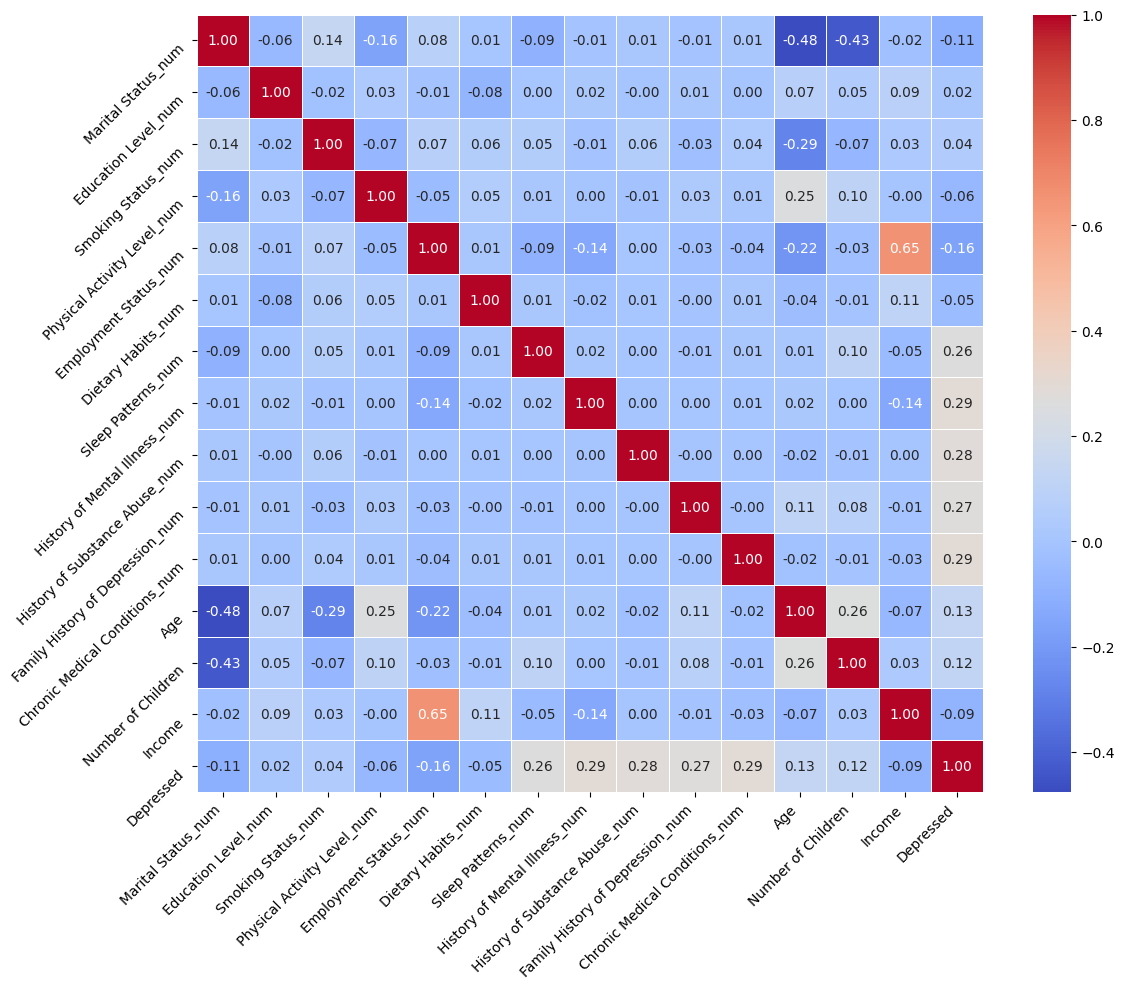

In [69]:
#ANALISIS VARIABLE MULTIVARIANTE
#Análisis númerico - categorico

# Convertir las columnas categóricas a numéricas
df['Marital Status_num'] = pd.factorize(df['Marital Status'])[0]
df['Education Level_num'] = pd.factorize(df['Education Level'])[0]
df['Smoking Status_num'] = pd.factorize(df['Smoking Status'])[0]
df['Physical Activity Level_num'] = pd.factorize(df['Physical Activity Level'])[0]
df['Employment Status_num'] = pd.factorize(df['Employment Status'])[0]
df['Dietary Habits_num'] = pd.factorize(df['Dietary Habits'])[0]
df['Sleep Patterns_num'] = pd.factorize(df['Sleep Patterns'])[0]
df['History of Mental Illness_num'] = df['History of Mental Illness'].map({'Yes': 1, 'No': 0})
df['History of Substance Abuse_num'] = df['History of Substance Abuse'].map({'Yes': 1, 'No': 0})
df['Family History of Depression_num'] = df['Family History of Depression'].map({'Yes': 1, 'No': 0})
df['Chronic Medical Conditions_num'] = df['Chronic Medical Conditions'].map({'Yes': 1, 'No': 0})


columnas_correlacion = [
    'Marital Status_num', 'Education Level_num', 'Smoking Status_num',
    'Physical Activity Level_num', 'Employment Status_num', 'Dietary Habits_num',
    'Sleep Patterns_num', 'History of Mental Illness_num',
    'History of Substance Abuse_num', 'Family History of Depression_num',
    'Chronic Medical Conditions_num', 'Age', 'Number of Children', 'Income',
    'Depressed'
]

plt.figure(figsize=(12, 10))
sns.heatmap(df[columnas_correlacion].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

plt.tight_layout()
plt.show()


Resumen de análisis de correlación

Las variables con mayor correlación positiva con la condición de estar deprimido (Depressed) fueron:
- Condiciones médicas crónicas (+0.29)
- Historial de enfermedad mental (+0.29)
- Abuso de sustancias (+0.28)
- Antecedentes familiares de depresión (+0.27)
- Patrones de sueño pobres (+0.26)
Estas variables muestran una asociación significativa, lo cual indica que las personas con estos antecedentes tienen mayor probabilidad de presentar depresión.

También se observaron algunas correlaciones bajas con edad (+0.13) y número de hijos (+0.12), mientras que variables como nivel educativo, consumo de alcohol, ingresos y estado civil mostraron correlaciones muy débiles o nulas.

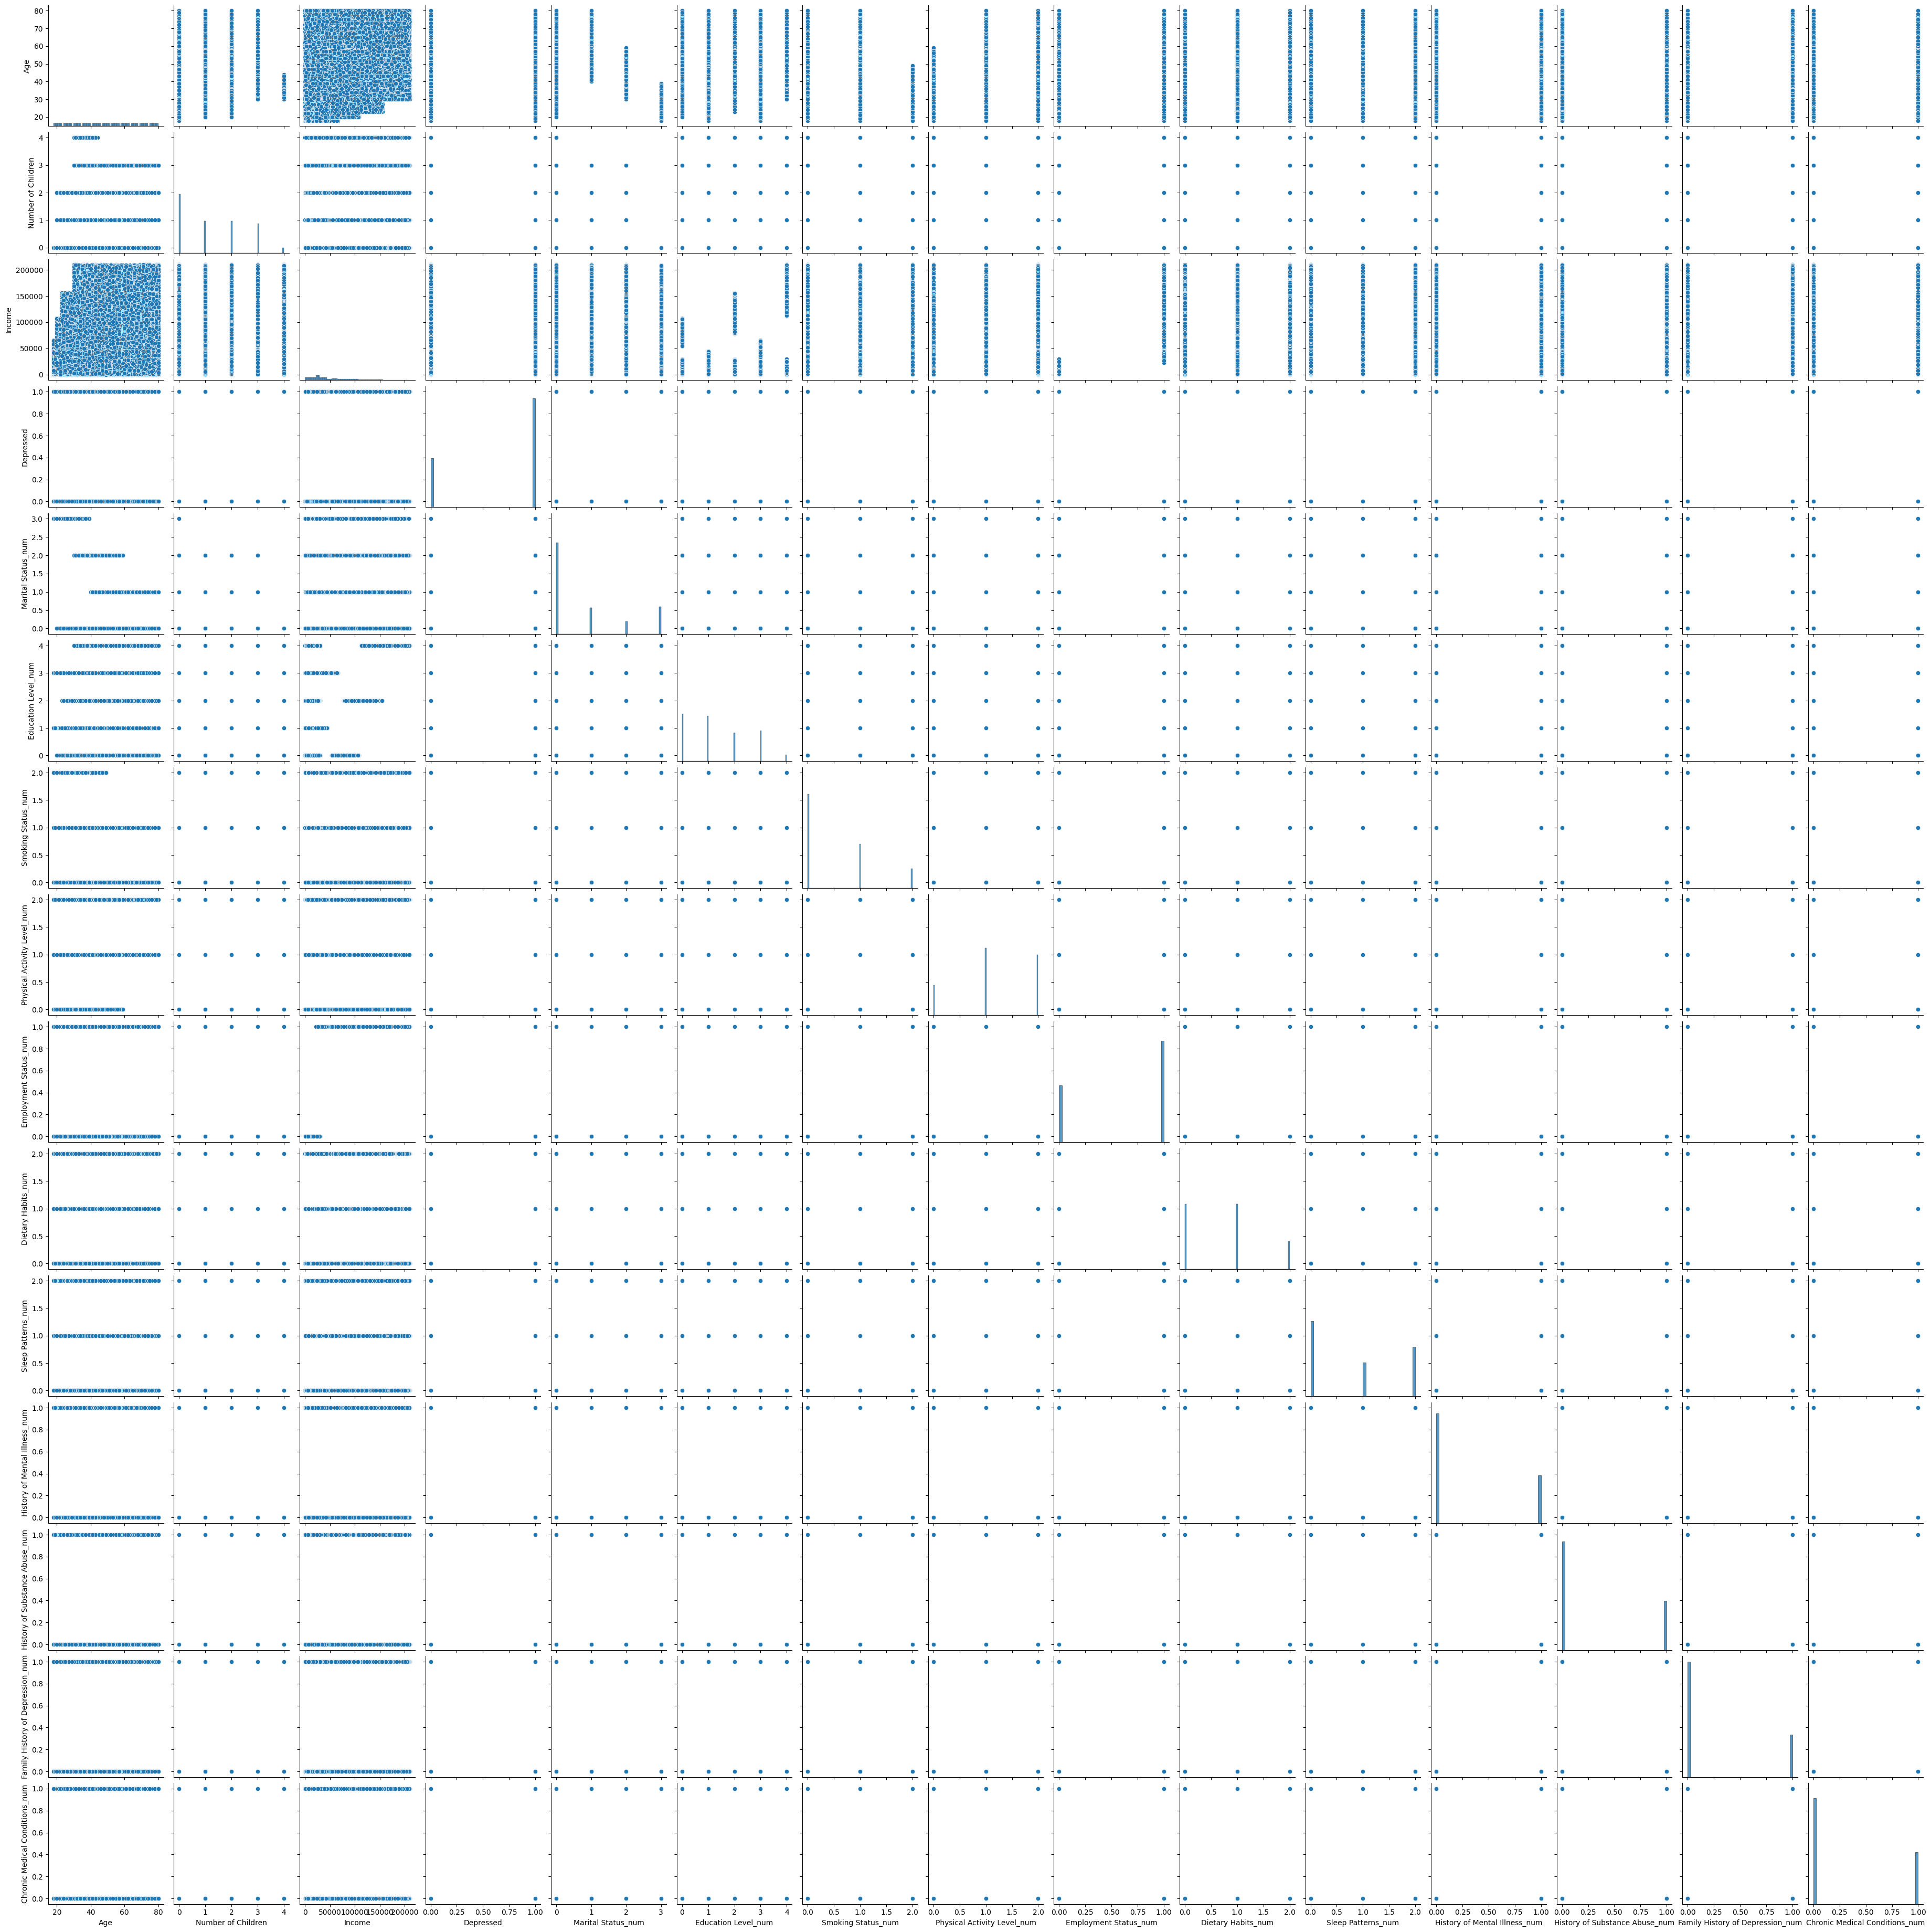

In [71]:
sns.pairplot(data=df)
plt.show()

In [72]:
#Ingeniería de características
df.describe()

,Age,Number of Children,Income,Depressed,Marital Status_num,Education Level_num,Smoking Status_num,Physical Activity Level_num,Employment Status_num,Dietary Habits_num,Sleep Patterns_num,History of Mental Illness_num,History of Substance Abuse_num,Family History of Depression_num,Chronic Medical Conditions_num
count,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971,0.690322,0.846544,1.385897,0.523288,1.191189,0.642048,0.763295,0.837573,0.304096,0.311498,0.268878,0.329187
std,18.158759,1.237054,40624.100565,0.462362,1.154889,1.211382,0.701393,0.732144,0.479398,0.728793,0.873154,0.460024,0.463106,0.443377,0.469919
min,18.000000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,21001.030000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,37520.135000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,2.000000,76616.300000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,80.000000,4.000000,209995.220000,1.000000,3.000000,4.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


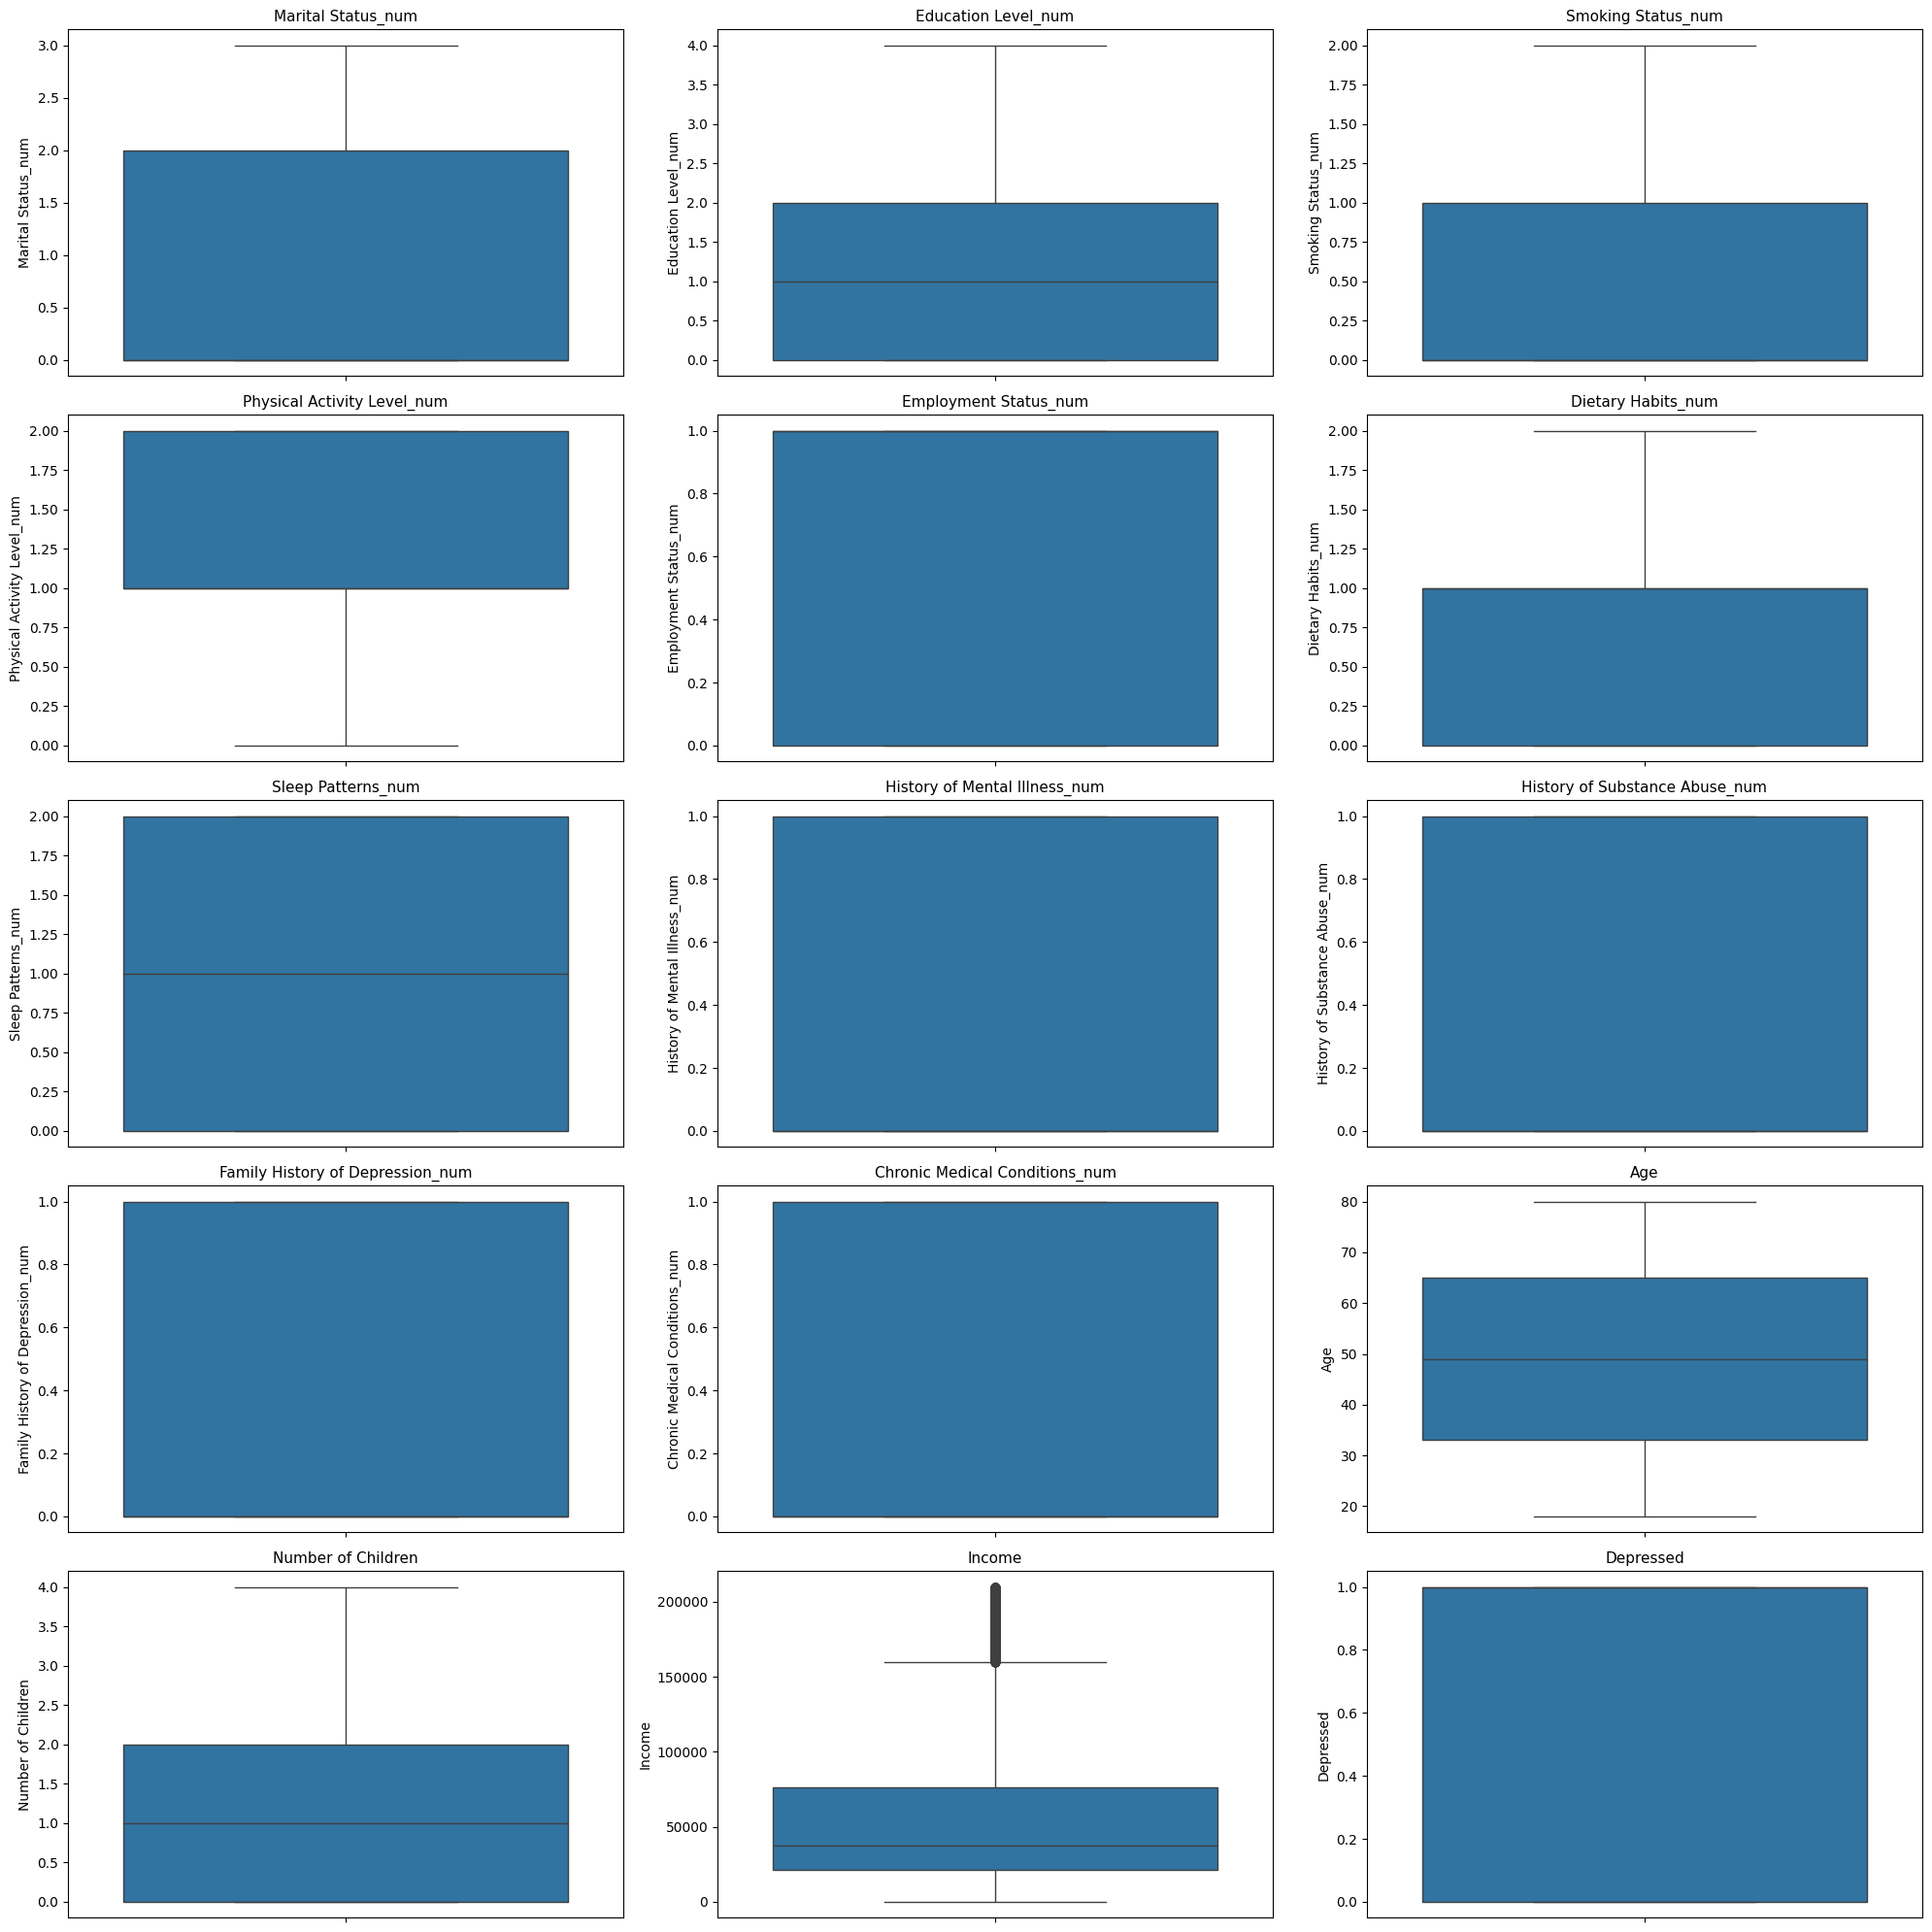

: 

In [ ]:
#Boxplot general
import matplotlib.pyplot as plt
import seaborn as sns


fig, axis = plt.subplots(5, 3, figsize=(20, 20))
contador = 0

for columna in columnas_correlacion:
    row = contador // 3
    col = contador % 3
    sns.boxplot(ax=axis[row, col], data=df, y=columna)
    axis[row, col].set_title(columna, fontsize=11)
    axis[row, col].tick_params(axis='x', rotation=45, labelsize=9)
    contador += 1

# Eliminar cuadros vacíos
if contador < 15:
    for i in range(contador, 15):
        fig.delaxes(axis[i // 3, i % 3])

plt.tight_layout()
plt.show()



RECOMENDACIONES CHAT GPT
✅ Resumen de Recomendaciones
🎯 Tipo de modelo:
Clasificación binaria (Detectar si alguien está deprimido o no)


📌 Variables recomendadas:
Mantener:
Chronic Medical Conditions, History of Mental Illness, History of Substance Abuse,
Family History of Depression, Sleep Patterns


Opcionales:
Age, Number of Children, Employment Status


⚠️ Desbalance de clases:
Depressed = 1 (deprimido) representa el 69% del total



Recomendación:

Usar métricas como recall, F1-score, o AUC

Aplicar class_weight='balanced' o usar técnicas como SMOTE



🤖 Modelos recomendados:
Logistic Regression (para baseline)

Random Forest / XGBoost (para mejor rendimiento)

SVM (si reduces el dataset por tamaño)




🛠️ Validación y optimización:
Aplicar train_test_split(stratify=y)

Usar GridSearchCV o RandomizedSearchCV

Evaluar con matriz de confusión y métricas balanceadas



⚙️ Preprocesamiento:
Escalar variables si usarás modelos sensibles a escala (como SVM o KNN)

Para Random Forest o XGBoost, no es obligatorio escalar

In [ ]:
#Paso 6: Construye el modelo y optimízalo